In [72]:
from methods import *
import warnings
warnings.filterwarnings('ignore')

In [25]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams.update({'font.size': 10})

clusters_colors_fix = {0:"#d62828", 1: "#2a9d8f", 2:"#014f86"}
clusters_colors_rand = {0:"#f3722c", 1: "#00509d", 2:"#b5179e"}

In [3]:
fix = pd.read_csv("fix.csv")
rand = pd.read_csv("rand.csv")

In [4]:
#Minimum and maximum rounds for analysis
min_r = 1
max_r = 100

In [5]:
fix_vector = create_vector(fix) #vectors used for clustering
rand_vector = create_vector(rand) 

In [6]:
context_vars = ["CC", "CD", "DC", "DD"] # Variables used for 1st clustering
coop_vars = ["CCC", "CDC", "DCC", "DDC"] # Variables used for 2nd clustering

# Fixed Partners

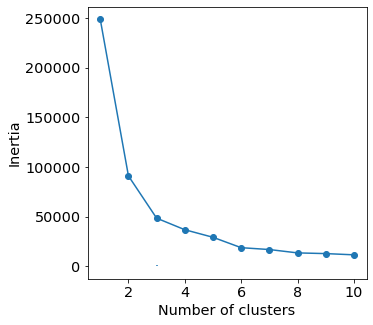

In [7]:
plot_kmeans_curve(fix_vector, context_vars, "k_means_context_fix")

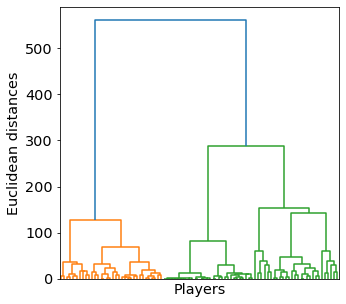

In [8]:
plot_dendogram(fix_vector, context_vars, "dend_context_fix")

In [9]:
y_km = perform_kmeans(fix_vector, 3, context_vars) #Performs k-means with 3 clusters
print(get_silhouette(fix_vector[context_vars], y_km))

fix_vector = add_clustering_vector(fix_vector, "km_cont_%d_%d" % (min_r, max_r), y_km) #adds the cluster number to the data
fix = add_clustering_data(fix, fix_vector, "km_cont_%d_%d" % (min_r, max_r))

0.5445527699619227


In [10]:
y_hc = perform_hc(fix_vector, 3, context_vars) #Performs HC with 3 clusters
print(get_silhouette(fix_vector[context_vars], y_hc))

fix_vector = add_clustering_vector(fix_vector, "hc_cont_%d_%d" % (min_r, max_r), y_hc)
fix = add_clustering_data(fix, fix_vector, "hc_cont_%d_%d" % (min_r, max_r))

0.5531365509553032


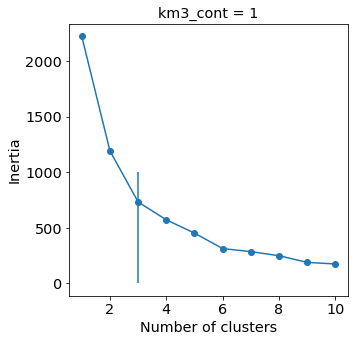

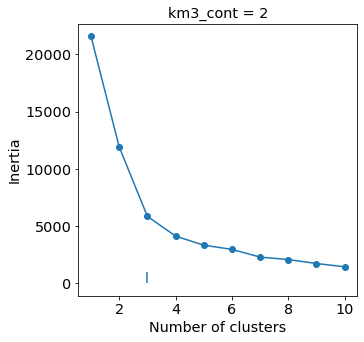

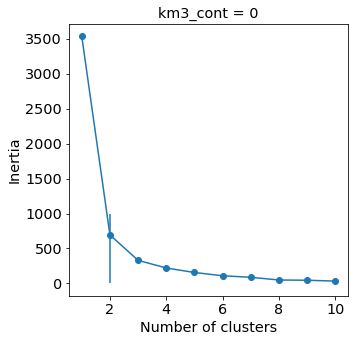

In [11]:
for c in fix_vector["km_cont_%d_%d" % (min_r, max_r)].unique(): #For each cluster, plot a curve to pick the number of sub_clusters
    plt.title("km3_cont = %d" % c)
    plot_kmeans_curve(fix_vector.loc[fix_vector["km_cont_%d_%d" % (min_r, max_r)] == c], coop_vars, "km_sub_%d" % c)
   

In [12]:
clusters = [0, 2, 3, 3] #Clusters picked based on the curves
fix_vector["km_cont_sub_%d_%d" % (min_r, max_r)] = -1 #subcluster variable
fix["km_cont_sub_%d_%d" % (min_r, max_r)] = -1

for c in range(0, 3):
    df = fix_vector.loc[fix_vector["km_cont_%d_%d" % (min_r, max_r)] == c]
    y_km = perform_kmeans(df, clusters[c + 1], coop_vars)
    fix_vector.loc[fix_vector["km_cont_%d_%d" % (min_r, max_r)] == c, "km_cont_sub_%d_%d" % (min_r, max_r)] = y_km + sum(clusters[0:c+1])
    fix = add_clustering_data(fix, fix_vector, "km_cont_sub_%d_%d" % (min_r, max_r))
    print(get_silhouette(df[coop_vars], y_km))

0.6868385555893008
0.3848910391013053
0.462739440810122


# Shuffled Partners

In [13]:
rand = get_prev_actions(rand, 2)


In [14]:
rand_vector = create_vector(rand)

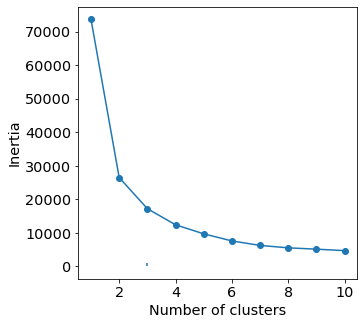

In [15]:
plot_kmeans_curve(rand_vector, context_vars, "k_means_context_context_rand")

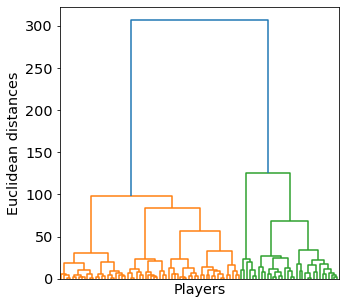

In [16]:
plot_dendogram(rand_vector, context_vars, "dend_context_rand")

In [17]:
y_km = perform_kmeans(rand_vector, 3, context_vars) # perform K-means with 3 clusters
print(get_silhouette(rand_vector[context_vars], y_km))

rand_vector = add_clustering_vector(rand_vector, "km_cont_%d_%d" % (min_r, max_r), y_km)
rand = add_clustering_data(rand, rand_vector, "km_cont_%d_%d" % (min_r, max_r))


0.42011339564554495


In [18]:
y_hc = perform_hc(rand_vector, 2, context_vars) #performs HC with 2 clusters
print(get_silhouette(rand_vector[context_vars], y_hc))

rand_vector = add_clustering_vector(rand_vector, "hc_cont_%d_%d" % (min_r, max_r), y_hc)
rand = add_clustering_data(rand, rand_vector, "hc_cont_%d_%d" % (min_r, max_r))

0.537006617525857


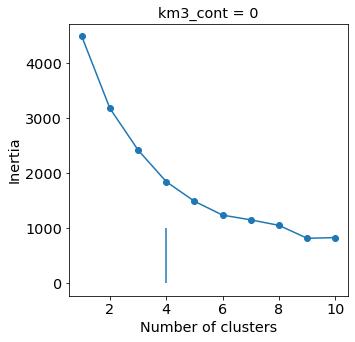

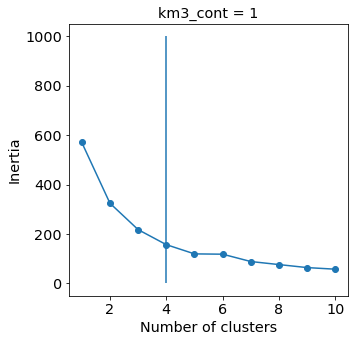

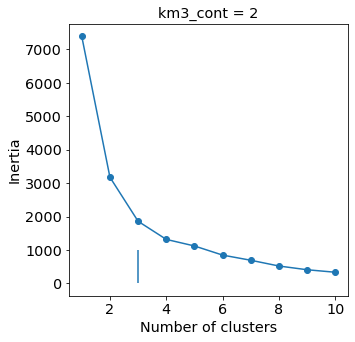

In [19]:
for c in rand_vector["km_cont_%d_%d" % (min_r, max_r)].unique(): #per cluster, plot a curve to pick the k
    plt.title("km3_cont = %d" % c)
    plot_kmeans_curve(rand_vector.loc[rand_vector["km_cont_%d_%d" % (min_r, max_r)] == c], coop_vars, "km_sub_%d_rand" % c)
    

In [20]:
clusters = [0, 4, 4, 3] #Number of clusters picked from the curves above
rand_vector["km_cont_sub_%d_%d" % (min_r, max_r)] = -1 #subcluster variables
rand["km_cont_sub_%d_%d" % (min_r, max_r)] = -1

for c in range(0, 3):
    df = rand_vector.loc[rand_vector["km_cont_%d_%d" % (min_r, max_r)] == c]
    y_km = perform_kmeans(df, clusters[c + 1], coop_vars) #perform k-means with the k picked from the curves
    rand_vector.loc[rand_vector["km_cont_%d_%d" % (min_r, max_r)] == c, "km_cont_sub_%d_%d" % (min_r, max_r)] = y_km + sum(clusters[0:c+1])
    rand = add_clustering_data(rand, rand_vector, "km_cont_sub_%d_%d" % (min_r, max_r))
    print(get_silhouette(df[coop_vars], y_km))

0.2993632484853281
0.4417295328082821
0.41768058450810663


In [35]:
#For readability, we formatted the cluster as such
cluster_letters_fix = {0:"A",1:"B",2:"C"}
cluster_letters_rand = {0:"D",1:"E",2:"F"}
subcluster_letters_fix = {0:"A.0",1:"A.1",2:"B.0",3:"B.1",4:"B.2",5:"C.0",6:"C.1",7:"C.2"}
subcluster_letters_rand = {0:"D.0",1:"D.1",2:"D.2",3:"D.3",4:"E.0",5:"E.1",6:"E.2",7:"E.3",8:"F.0",9:"F.1",10:"F.2"}

# Charts for the paper

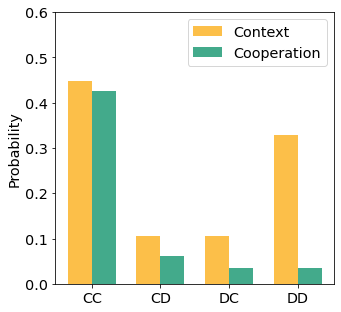

In [21]:
fig, ax = plt.subplots()
labels = ["CC", "CD", "DC", "DD"]
width = 0.35

ind = np.arange(4)
prev_sum = fix_vector[["CC", "CD", "DC", "DD"]].sum()
coop_sum = fix_vector[["CCC", "CDC", "DCC", "DDC"]].sum()

ax.bar(ind, prev_sum/9200, width, label='Context', color = "#fcbf49")
ax.bar(ind + width, coop_sum/9200, width, label='Cooperation', color = "#43aa8b")

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.set_ylabel('Probability')
#ax.set_title('Fixed Partners')
ax.legend()
#plt.show()
plt.ylim(0,0.6)
plt.savefig("images/charts/freq_context_fix.png", bbox_inches="tight", dpi = 300)

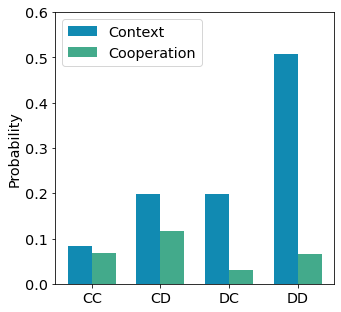

In [22]:
fig, ax = plt.subplots()
labels = ["CC", "CD", "DC", "DD"]
width = 0.35

ind = np.arange(4)
prev_sum = rand_vector[["CC", "CD", "DC", "DD"]].sum()
coop_sum = rand_vector[["CCC", "CDC", "DCC", "DDC"]].sum()

ax.bar(ind, prev_sum/9600, width, label='Context', color = "#118ab2")
ax.bar(ind + width, coop_sum/9600, width, label='Cooperation', color = "#43aa8b")

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.set_ylabel('Probability')
#ax.set_title('randed Partners')
ax.legend()
plt.ylim(0,0.6)
#plt.show()
plt.savefig("images/charts/freq_context_rand.png", bbox_inches="tight", dpi = 300)

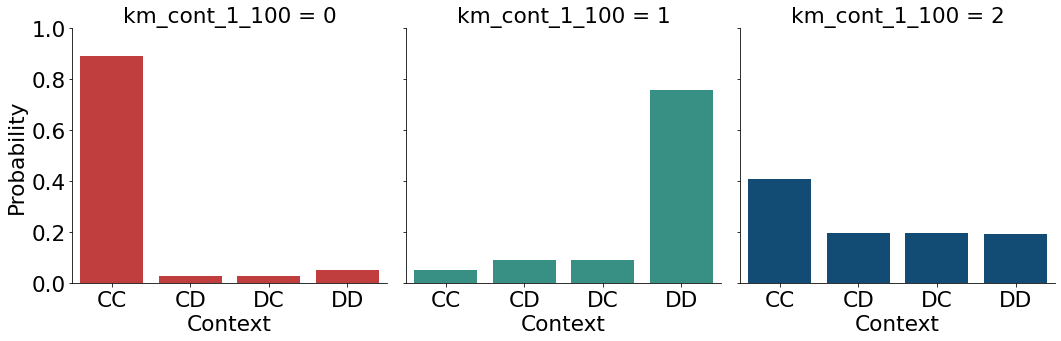

In [27]:
fix_cont = fix.loc[fix["round"] > 1].groupby(["km_cont_%d_%d" % (min_r, max_r), "prev"])["round"].count() / fix.groupby(["km_cont_%d_%d" % (min_r, max_r)])["round"].count()
fix_cont = fix_cont.reset_index()
g = sns.FacetGrid(fix_cont, col = "km_cont_%d_%d" % (min_r, max_r), hue = "km_cont_%d_%d" % (min_r, max_r), height = 5, palette = {0:clusters_colors_fix[0], 1:clusters_colors_fix[1], 2:clusters_colors_fix[2]})
g.map(sns.barplot, "prev", "round", order = ["CC", "CD", "DC", "DD"])
g.set(xlabel='Context')
#g.set_titles("Cluster {col_name}")
g.axes[0,0].set_ylabel('Probability')
plt.ylim(0,1)
plt.rcParams.update({'font.size': 15})
plt.savefig("images/charts/context_cluster_fix.png", bbox_inches="tight", dpi = 300)

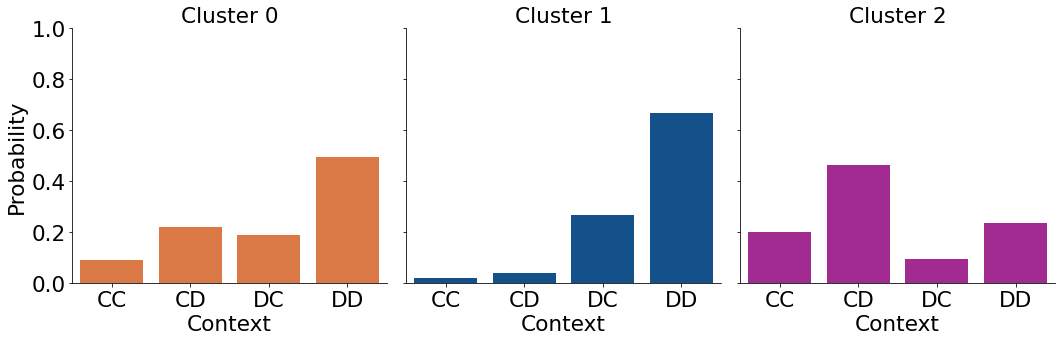

In [28]:
rand_cont = rand.loc[rand["round"] > 1].groupby(["km_cont_%d_%d" % (min_r, max_r), "prev"])["round"].count() / rand.groupby(["km_cont_%d_%d" % (min_r, max_r)])["round"].count()
rand_cont = rand_cont.reset_index()
g = sns.FacetGrid(rand_cont, col = "km_cont_%d_%d" % (min_r, max_r), hue = "km_cont_%d_%d" % (min_r, max_r), palette = {0:clusters_colors_rand[0], 1:clusters_colors_rand[1], 2:clusters_colors_rand[2]}, height = 5)
g.map(sns.barplot, "prev", "round", order = ["CC", "CD", "DC", "DD"])
g.set(xlabel='Context')
g.set_titles("Cluster {col_name}")
g.axes[0,0].set_ylabel('Probability')
plt.ylim(0,1)
plt.savefig("images/charts/context_cluster_rand.png", bbox_inches="tight", dpi = 300)

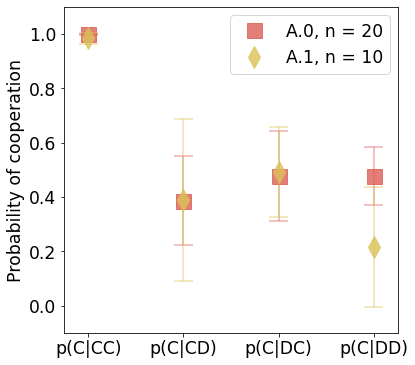

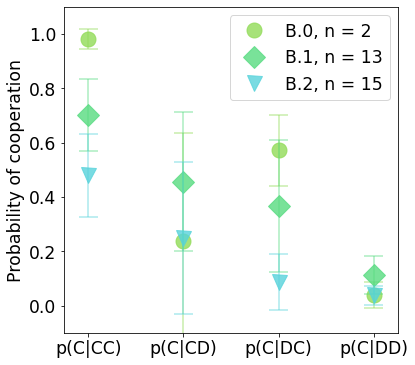

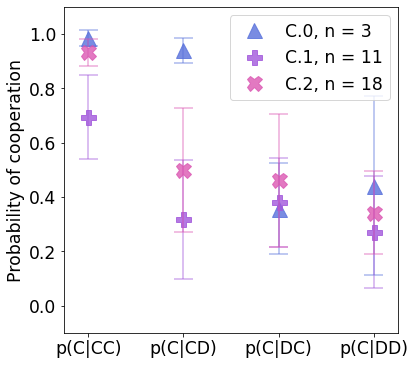

In [29]:
letters = {0:"A", 1:"B", 2:"C"}
plt.rcParams.update({'font.size': 12})
for i in sorted(fix_vector["km_cont_1_100"].unique()):
    f = fix_vector.loc[fix_vector["km_cont_1_100"] == i]
    plot_cluster_prob(f, "km_cont_sub_1_100", palette=sns.color_palette("hls", 8).as_hex(), cluster_label=letters[i])
    #plt.title("K-Means: Cluster: %d, n: %d" % (i, f.shape[0]))
    plt.savefig("images/charts/prob_coop_fix_%d" % i, bbox_inches="tight", dpi = 300)

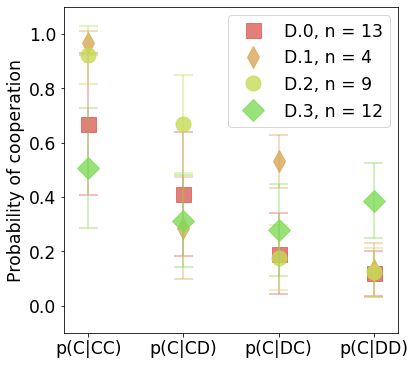

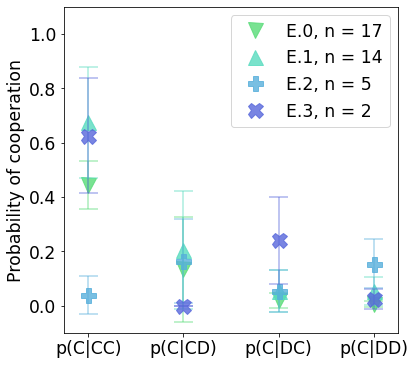

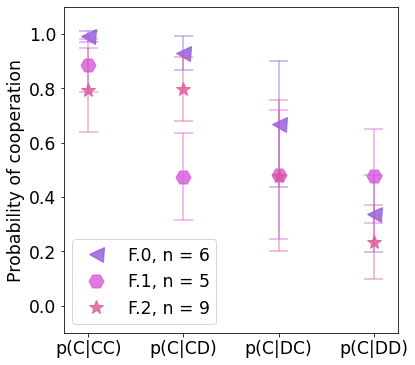

In [30]:
cluster_letters_rand = {0:"D", 1:"E", 2:"F"}
for i in rand_vector["km_cont_1_100"].unique():
    f = rand_vector.loc[rand_vector["km_cont_1_100"] == i]
    plot_cluster_prob(f, "km_cont_sub_1_100", palette=sns.color_palette("hls", 11).as_hex(), cluster_label=cluster_letters_rand[i])
    #plt.title("K-Means: Cluster: %d, n: %d" % (i, f.shape[0]))
    plt.savefig("images/charts/prob_coop_rand_%d" % i, bbox_inches="tight", dpi = 300)

# tSNE Plots

In [31]:
x = fix_vector[['CC', 'CD', 'DC', 'DD', 'CCC', 'CDC', 'DCC', 'DDC']].values
x = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=3000, random_state = 101)
tsne_results = tsne.fit_transform(x)
fix_vector['tsne-2d-one'] = tsne_results[:,0]
fix_vector['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 92 samples in 0.000s...
[t-SNE] Computed neighbors for 92 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 92 / 92
[t-SNE] Mean sigma: 0.987094
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.206764
[t-SNE] KL divergence after 1950 iterations: 0.206848


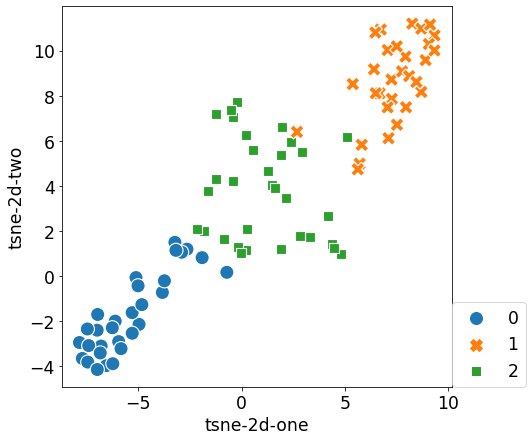

In [32]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="km_cont_1_100",
    #color = "black",
    palette=sns.color_palette("tab10", 3),
    s = 200,
    style = "km_cont_1_100",
    data=fix_vector,
    legend="full",
    alpha=1.0
)
plt.legend(loc = (1,0), markerscale = 2)

In [33]:
x = rand_vector[['CC', 'CD', 'DC', 'DD', 'CCC', 'CDC', 'DCC', 'DDC']].values
x = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state = 1000)
tsne_results = tsne.fit_transform(x)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 1.316248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.431561
[t-SNE] KL divergence after 1100 iterations: 0.186149


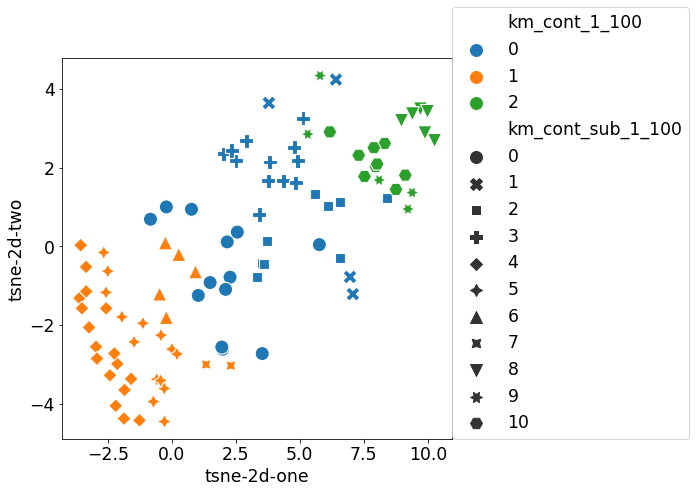

In [34]:
rand_vector['tsne-2d-one'] = tsne_results[:,0]
rand_vector['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="km_cont_1_100",
    palette=sns.color_palette("tab10", 3),
    s = 200,
    style = "km_cont_sub_1_100",
    data=rand_vector,
    legend="full",
    alpha=1
)
plt.legend(loc = (1,0), markerscale = 2)

In [36]:
#For better format in the cluster labels
fix_vector["treatment"] = "FP"
rand_vector["treatment"] = "SP"
fix_vector["cluster"] = fix_vector["km_cont_1_100"].replace(cluster_letters_fix)
fix_vector["subcluster"] = fix_vector["km_cont_sub_1_100"].replace(subcluster_letters_fix)
rand_vector["cluster"] = rand_vector["km_cont_1_100"].replace(cluster_letters_rand)
rand_vector["subcluster"] = rand_vector["km_cont_sub_1_100"].replace(subcluster_letters_rand)

In [37]:
#For the figure with the two treatments
vectors = fix_vector[['CC', 'CD', 'DC', 'DD', 'CCC', 'CDC', 'DCC', 'DDC', "treatment", "cluster", "subcluster"]].append(rand_vector[['CC', 'CD', 'DC', 'DD', 'CCC', 'CDC', 'DCC', 'DDC', "treatment", "cluster", "subcluster"]])
x = vectors[['CC', 'CD', 'DC', 'DD', 'CCC', 'CDC', 'DCC', 'DDC']].values
x = StandardScaler().fit_transform(x)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state = 1001)
tsne_results = tsne.fit_transform(x)

vectors['tsne-2d-one'] = tsne_results[:,0]
vectors['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 188 samples in 0.000s...
[t-SNE] Computed neighbors for 188 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 188 / 188
[t-SNE] Mean sigma: 1.036841
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.614117
[t-SNE] KL divergence after 1250 iterations: 0.279449


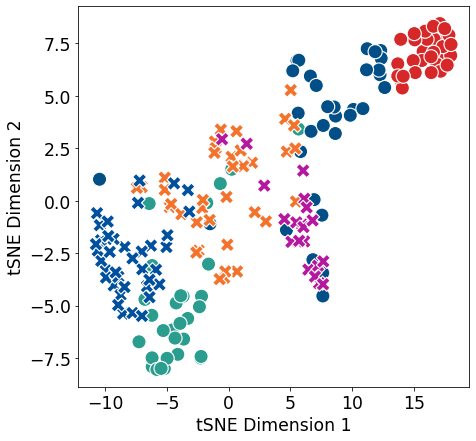

In [40]:
vectors = vectors.sort_values(by = "subcluster")
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=list(clusters_colors_fix.values()) + list(clusters_colors_rand.values()),
    s = 200,
    style = "treatment",
    markers = {"FP":"o", "SP":"X"},
    data=vectors,
    legend=False,
    alpha=1
)
#plt.legend(loc = (1,0), markerscale = 2)
plt.xlabel("tSNE Dimension 1")
plt.ylabel("tSNE Dimension 2")
plt.savefig("images/charts/tsne_both.png", bbox_inches="tight", dpi = 300)

# Hidden Markov Models

In [41]:
#Different matrix topologies for a sequential HMM
matrices = {1: np.array([[1]]),
            2: np.array([[0.5,0.5],
                       [0,1]]),
            3: np.array([[0.5, 0.2, 0.3],
                     [0.0, 0.5,0.5],
                           [0,0,1]]),
            4: np.array([[0.5, 0.2, 0.2,0.1],
                     [0.0, 0.5,0.4, 0.1],
                           [0,0,0.5,0.5],
                        [0,0,0,1]])}

In [43]:
#Initial probabilities
initial_probs = {1:[1.0],
                2:[1.0,0],
                3:[1.0,0,0],
                4:[1.0,0,0,0]}

In [66]:
#Data frame for scores for each number of hidden states
scores_df = pd.DataFrame()
scores_df["subcluster"] = ""
scores_df["hidden_states"] = ""
scores_df["mean_score"] = ""
scores_df["std_score"] = ""
scores_df["predicted_states"] = ""
scores_df["rounds"] = ""
scores_df["n_players"] = ""
scores_df["treatment"] = ""
scores_df["emission"] = ""
scores_df["transition"] = ""

In [42]:
# The HMM receives an integer for each symbol representation

context = {"CCC":0,"CCD":1,"CDC":2,"CDD":3, "DCC":4, "DCD":5, "DDC":6, "DDD":7}
seq = []
fix["seq"] = ""
for c in fix.context:
    if c == "--":
        seq.append("00")
    else:    
        seq.append(context[c])
fix["seq"] = seq

In [57]:
context = {"CCC":0,"CCD":1,"CDC":2,"CDD":3, "DCC":4, "DCD":5, "DDC":6, "DDD":7}
seq = []
rand["seq"] = ""
for c in rand.context:
    if c == "--":
        seq.append("00")
    else:    
        seq.append(context[c])
rand["seq"] = seq

In [46]:
# To test the strategies in different times, we defined windows of 25 rounds
r_windows = [(1,25),(26,50), (51,75), (76,100), (1,100)]

In [67]:
#Fixed Partners
subclusters = range(0, 8) #Number of subclusters
hidden_list = range(1,5) # Number of possible hidden states
for r_win in range(len(r_windows)): #loop over different round windows
    min_r = r_windows[r_win][0]
    max_r = r_windows[r_win][1]
    for subcluster in subclusters: # For each subcluster, test different number of hidden states
        for hidden_states in hidden_list:
            l = len(fix_vector.loc[fix_vector.km_cont_sub_1_100==subcluster])
            actions = fix.loc[(fix.km_cont_sub_1_100 == subcluster) & (fix["round"] > 1) & (fix["round"] >= min_r) & (fix["round"] <= max_r), "seq"]
            X = []
            for a in actions:
                X.append([a])
            scores = []
            high_score = 100000
            lengths = int(len(X)/ (l))
            for i in range (1,1000):
                model = hmm.MultinomialHMM(n_components=hidden_states,  n_iter=1000, algorithm = "viterbi", 
                                       verbose = False, params = "ste", init_params = "e")
                model.transmat_ = matrices[hidden_states]
                model.startprob_ = initial_probs[hidden_states]
                model.fit(X, lengths)
                score = model.score(X, lengths)
                scores.append(score)
                if score < high_score:
                    high_score = score
                    b_model = model

            mean_score = np.mean(scores)
            std_score = np.std(scores)
            emission = b_model.emissionprob_
            emission = np.round(emission, 3) #Emission matrix
            trans = b_model.transmat_
            trans = np.round(trans, 3) #Transition matrix
            start_probs = b_model.startprob_
            display("%f, %f" % (mean_score, std_score))
            display(pd.Series(b_model.predict(X, lengths)).value_counts())
            scores_df.loc[len(scores_df)] = [subcluster, hidden_states, np.round(mean_score, 2), np.round(std_score, 2), len(pd.Series(b_model.predict(X, lengths)).unique()), "%d-%d" % (min_r, max_r), l, "FP", trans, emission]

'-17.556363, 0.000000'

0    24
dtype: int64

'-11.022238, 1.361410'

1    23
0     1
dtype: int64

'-9.632491, 0.800537'

2    22
0     1
1     1
dtype: int64

'-8.073577, 1.393465'

3    22
0     1
2     1
dtype: int64

'-41.081586, 0.000000'

0    24
dtype: int64

'-37.951351, 1.471682'

1    23
0     1
dtype: int64

'-35.142488, 3.137164'

2    20
0     2
1     2
dtype: int64

'-32.323599, 3.200237'

3    22
0     1
2     1
dtype: int64

'-35.634634, 0.000000'

0    24
dtype: int64

'-29.078451, 1.801601'

0    24
dtype: int64

'-26.614331, 1.231260'

0    24
dtype: int64

'-24.930266, 1.004266'

0    13
1     9
2     2
dtype: int64

'-41.421384, 0.000000'

0    24
dtype: int64

'-40.436206, 0.365735'

0    24
dtype: int64

'-38.780833, 0.250970'

0    15
1     9
dtype: int64

'-36.714836, 0.565353'

3    21
0     2
2     1
dtype: int64

'-37.090150, 0.000000'

0    24
dtype: int64

'-35.420687, 0.199419'

0    24
dtype: int64

'-33.449051, 0.762248'

0    20
1     4
dtype: int64

'-32.342127, 0.763118'

0    19
2     4
1     1
dtype: int64

'-16.635532, 0.000000'

0    24
dtype: int64

'-16.002653, 0.328496'

0    24
dtype: int64

'-15.373058, 0.406417'

0    24
dtype: int64

'-14.545482, 0.573425'

0    24
dtype: int64

'-42.496884, 0.000000'

0    24
dtype: int64

'-40.814636, 0.471595'

0    24
dtype: int64

'-39.594769, 0.349699'

2    22
0     2
dtype: int64

'-38.308004, 0.517612'

3    16
1     6
0     1
2     1
dtype: int64

'-32.979236, 0.000000'

0    24
dtype: int64

'-28.180037, 1.053347'

0    24
dtype: int64

'-23.699509, 1.440377'

0    19
2     4
1     1
dtype: int64

'-21.060108, 2.558425'

0    19
2     4
1     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

1    24
0     1
dtype: int64

'0.000000, 0.000000'

2    24
0     1
dtype: int64

'0.000000, 0.000000'

3    23
0     1
2     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-4.198604, 0.000000'

0    25
dtype: int64

'-4.032764, 0.155412'

0    25
dtype: int64

'-3.887137, 0.238224'

0    25
dtype: int64

'-3.727569, 0.286171'

0    25
dtype: int64

'-36.752817, 0.000000'

0    25
dtype: int64

'-34.696848, 0.455388'

0    25
dtype: int64

'-32.843669, 1.227457'

0    21
1     4
dtype: int64

'-30.514161, 1.813222'

0    20
3     4
2     1
dtype: int64

'-30.492022, 0.000000'

0    25
dtype: int64

'-29.714124, 0.433846'

0    25
dtype: int64

'-27.388996, 1.329965'

2    22
0     3
dtype: int64

'-25.803815, 1.985448'

0    21
2     3
1     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'-43.344491, 0.000000'

0    25
dtype: int64

'-39.059910, 0.756450'

0    25
dtype: int64

'-37.099048, 0.987944'

0    16
1     9
dtype: int64

'-35.241063, 1.040267'

0    14
2     9
1     2
dtype: int64

'-31.694866, 0.000000'

0    25
dtype: int64

'-28.399106, 0.761424'

0    25
dtype: int64

'-25.527348, 2.181204'

0    22
2     2
1     1
dtype: int64

'-22.465670, 2.544905'

0    15
1     7
3     3
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

1    24
0     1
dtype: int64

'0.000000, 0.000000'

2    24
0     1
dtype: int64

'0.000000, 0.000000'

3    23
0     1
2     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-17.261413, 0.000000'

0    25
dtype: int64

'-13.752828, 1.243449'

0    25
dtype: int64

'-12.455140, 1.053600'

2    24
0     1
dtype: int64

'-11.502845, 1.666326'

3    24
0     1
dtype: int64

'-10.991747, 0.000000'

0    25
dtype: int64

'-8.400428, 1.036060'

0    25
dtype: int64

'-7.546274, 0.759616'

2    24
0     1
dtype: int64

'-6.975310, 0.750630'

3    24
0     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

1    24
0     1
dtype: int64

'-45.194965, 0.000000'

0    25
dtype: int64

'-43.089084, 0.275040'

0    22
1     3
dtype: int64

'-41.345259, 0.334800'

2    15
1     9
0     1
dtype: int64

'-39.917245, 0.678818'

3    19
1     4
0     1
2     1
dtype: int64

'-27.627165, 0.000000'

0    25
dtype: int64

'-23.469797, 2.761913'

0    25
dtype: int64

'-17.704446, 4.267648'

2    22
0     2
1     1
dtype: int64

'-13.306873, 4.283099'

3    22
0     2
2     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

1    24
0     1
dtype: int64

'0.000000, 0.000000'

2    24
0     1
dtype: int64

'0.000000, 0.000000'

3    23
0     1
2     1
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-8.355529, 0.000000'

0    25
dtype: int64

'-2.813424, 0.317774'

0    25
dtype: int64

'-0.854782, 1.280323'

2    23
0     2
dtype: int64

'-0.641132, 1.169018'

2    22
0     2
1     1
dtype: int64

'-24.286321, 0.000000'

0    25
dtype: int64

'-23.656975, 0.333176'

0    25
dtype: int64

'-21.992984, 1.224840'

0    25
dtype: int64

'-19.741019, 1.357693'

3    23
0     1
2     1
dtype: int64

'-31.428345, 0.000000'

0    25
dtype: int64

'-29.988046, 0.642162'

0    25
dtype: int64

'-27.611024, 0.868383'

0    25
dtype: int64

'-25.250849, 1.032491'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'0.000000, 0.000000'

0    25
dtype: int64

'-0.000000, 0.000000'

0    25
dtype: int64

'-44.175571, 0.000000'

0    25
dtype: int64

'-37.702637, 3.212041'

1    24
0     1
dtype: int64

'-33.015823, 1.652428'

2    23
0     1
1     1
dtype: int64

'-30.079906, 1.238309'

3    23
0     1
2     1
dtype: int64

'-25.359919, 0.000000'

0    25
dtype: int64

'-18.094694, 2.523507'

1    24
0     1
dtype: int64

'-12.786006, 3.485047'

2    23
0     1
1     1
dtype: int64

'-9.229332, 4.081279'

3    23
0     1
1     1
dtype: int64

'-25.074567, 0.000000'

0    99
dtype: int64

'-10.616955, 0.974366'

1    98
0     1
dtype: int64

'-9.631853, 0.643467'

2    93
0     6
dtype: int64

'-8.351135, 1.551998'

2    92
0     6
1     1
dtype: int64

'-80.083956, 0.000000'

0    99
dtype: int64

'-37.644753, 9.820214'

1    98
0     1
dtype: int64

'-33.092316, 2.695639'

2    91
1     7
0     1
dtype: int64

'-30.712363, 2.439839'

3    77
0    20
1     1
2     1
dtype: int64

'-110.158518, 0.000000'

0    99
dtype: int64

'-95.319322, 15.473885'

1    97
0     2
dtype: int64

'-63.579288, 16.277112'

2    96
0     2
1     1
dtype: int64

'-54.845385, 12.402611'

3    95
2     2
0     1
1     1
dtype: int64

'-142.313468, 0.000000'

0    99
dtype: int64

'-135.533243, 4.527879'

0    99
dtype: int64

'-132.058435, 3.777234'

0    99
dtype: int64

'-129.368800, 2.275847'

0    99
dtype: int64

'-131.445993, 0.000000'

0    99
dtype: int64

'-121.844946, 4.230902'

0    99
dtype: int64

'-118.409947, 2.685795'

0    99
dtype: int64

'-116.052707, 2.146866'

0    99
dtype: int64

'-36.563979, 0.000000'

0    99
dtype: int64

'-23.823513, 8.703535'

1    98
0     1
dtype: int64

'-17.330156, 2.059960'

2    98
0     1
dtype: int64

'-16.419363, 0.664207'

1    78
0    21
dtype: int64

'-187.050353, 0.000000'

0    99
dtype: int64

'-183.035140, 2.142411'

0    99
dtype: int64

'-179.550317, 1.251808'

0    93
1     3
2     3
dtype: int64

'-177.432321, 1.449582'

3    97
0     1
2     1
dtype: int64

'-123.822054, 0.000000'

0    99
dtype: int64

'-119.989432, 0.833630'

1    98
0     1
dtype: int64

'-115.486349, 1.739195'

2    92
0     7
dtype: int64

'-112.529721, 3.102023'

0    92
2     6
1     1
dtype: int64

In [69]:
#Shuffled Partners
subclusters = range(0, 11) #Number of subclusters
hidden_list = range(1,5) # Number of possible hidden states
for r_win in range(len(r_windows)): #loop over different round windows
    min_r = r_windows[r_win][0]
    max_r = r_windows[r_win][1]
    for subcluster in subclusters: # For each subcluster, test different number of hidden states
        for hidden_states in hidden_list:
            l = len(rand_vector.loc[rand_vector.km_cont_sub_1_100==subcluster])
            actions = rand.loc[(rand.km_cont_sub_1_100 == subcluster) & (rand["round"] > 1) & (rand["round"] >= min_r) & (rand["round"] <= max_r), "seq"]
            X = []
            for a in actions:
                X.append([a])
            scores = []
            high_score = 100000
            lengths = int(len(X)/ (l))
            for i in range (1,1000):
                model = hmm.MultinomialHMM(n_components=hidden_states,  n_iter=1000, algorithm = "viterbi", 
                                       verbose = False, params = "ste", init_params = "e")
                model.transmat_ = matrices[hidden_states]
                model.startprob_ = initial_probs[hidden_states]
                model.fit(X, lengths)
                score = model.score(X, lengths)
                scores.append(score)
                if score < high_score:
                    high_score = score
                    b_model = model

            mean_score = np.mean(scores)
            std_score = np.std(scores)
            emission = b_model.emissionprob_
            emission = np.round(emission, 3) #Emission matrix
            trans = b_model.transmat_
            trans = np.round(trans, 3) #Transition matrix
            start_probs = b_model.startprob_
            display("%f, %f" % (mean_score, std_score))
            display(pd.Series(b_model.predict(X, lengths)).value_counts())
            scores_df.loc[len(scores_df)] = [subcluster, hidden_states, np.round(mean_score, 2), np.round(std_score, 2), len(pd.Series(b_model.predict(X, lengths)).unique()), "%d-%d" % (min_r, max_r), l, "SP", trans, emission]

'-46.908439, 0.000000'

0    24
dtype: int64

'-37.913425, 1.838636'

1    23
0     1
dtype: int64

'-35.498675, 1.475013'

2    22
0     1
1     1
dtype: int64

'-33.445215, 2.209758'

0    16
2     4
1     2
3     2
dtype: int64

'-36.314230, 0.000000'

0    24
dtype: int64

'-29.079382, 3.697824'

0    24
dtype: int64

'-26.077511, 1.782500'

2    21
1     2
0     1
dtype: int64

'-24.655464, 1.000056'

3    21
0     1
1     1
2     1
dtype: int64

'-36.428459, 0.000000'

0    24
dtype: int64

'-33.823552, 0.366243'

0    24
dtype: int64

'-31.629348, 0.599693'

0    24
dtype: int64

'-30.650968, 0.748661'

0    14
1    10
dtype: int64

'-38.659894, 0.000000'

0    24
dtype: int64

'-36.717100, 0.295184'

1    23
0     1
dtype: int64

'-35.421276, 0.751712'

2    18
1     5
0     1
dtype: int64

'-34.106562, 0.650300'

3    18
2     5
0     1
dtype: int64

'-15.877518, 0.000000'

0    24
dtype: int64

'-15.474739, 0.236377'

0    24
dtype: int64

'-15.370495, 0.272952'

2    22
0     1
1     1
dtype: int64

'-14.618438, 0.842344'

0    24
dtype: int64

'-36.410554, 0.000000'

0    24
dtype: int64

'-32.432239, 0.756955'

0    24
dtype: int64

'-31.602575, 0.674476'

0    19
2     4
1     1
dtype: int64

'-30.445141, 0.580565'

0    19
1     5
dtype: int64

'-39.172043, 0.000000'

0    24
dtype: int64

'-38.183758, 0.365209'

0    24
dtype: int64

'-36.157404, 0.604917'

1    15
0     9
dtype: int64

'-34.840225, 0.386094'

3    14
0     6
1     3
2     1
dtype: int64

'-15.276340, 0.000000'

0    24
dtype: int64

'-14.813350, 0.248044'

0    24
dtype: int64

'-14.670611, 0.291526'

0    24
dtype: int64

'-14.442143, 0.323946'

0    24
dtype: int64

'-22.690957, 0.000000'

0    24
dtype: int64

'-22.008938, 0.409359'

0    24
dtype: int64

'-20.801928, 0.450742'

0    24
dtype: int64

'-19.998392, 0.931821'

0    24
dtype: int64

'-37.474955, 0.000000'

0    24
dtype: int64

'-34.327594, 0.827579'

1    23
0     1
dtype: int64

'-32.722839, 1.108444'

2    21
0     2
1     1
dtype: int64

'-30.780032, 0.805008'

3    22
0     1
2     1
dtype: int64

'-45.269473, 0.000000'

0    24
dtype: int64

'-41.844241, 1.354877'

1    23
0     1
dtype: int64

'-39.239140, 1.667547'

2    21
0     2
1     1
dtype: int64

'-36.945473, 1.623251'

3    17
0     3
1     2
2     2
dtype: int64

'-47.189732, 0.000000'

0    25
dtype: int64

'-43.008956, 1.409165'

0    25
dtype: int64

'-38.847734, 1.037678'

0    19
1     6
dtype: int64

'-36.207766, 0.879487'

3    23
0     1
2     1
dtype: int64

'-32.148893, 0.000000'

0    25
dtype: int64

'-31.678196, 0.150755'

0    25
dtype: int64

'-29.826373, 0.757018'

0    25
dtype: int64

'-27.751081, 1.287849'

0    25
dtype: int64

'-36.790072, 0.000000'

0    25
dtype: int64

'-35.376587, 0.298449'

0    25
dtype: int64

'-33.030943, 0.480033'

0    25
dtype: int64

'-30.565107, 0.572196'

3    20
0     4
2     1
dtype: int64

'-34.598854, 0.000000'

0    25
dtype: int64

'-32.760238, 0.413373'

0    25
dtype: int64

'-30.461434, 0.803205'

0    25
dtype: int64

'-29.278840, 1.197407'

0    10
2     9
3     5
1     1
dtype: int64

'-17.308674, 0.000000'

0    25
dtype: int64

'-16.787455, 0.356911'

1    24
0     1
dtype: int64

'-15.293497, 1.058409'

0    25
dtype: int64

'-14.196299, 1.091473'

0    25
dtype: int64

'-17.148245, 0.000000'

0    25
dtype: int64

'-16.624353, 0.293638'

0    25
dtype: int64

'-16.503959, 0.324537'

0    25
dtype: int64

'-15.963142, 0.759629'

3    23
0     1
2     1
dtype: int64

'-40.103814, 0.000000'

0    25
dtype: int64

'-37.784630, 0.718723'

0    25
dtype: int64

'-36.664630, 0.447001'

1    24
0     1
dtype: int64

'-35.369137, 0.917277'

3    23
0     1
2     1
dtype: int64

'-30.001947, 0.000000'

0    25
dtype: int64

'-27.715032, 1.608635'

0    25
dtype: int64

'-24.911119, 1.456243'

1    22
0     3
dtype: int64

'-22.292651, 1.353280'

2    22
1     2
0     1
dtype: int64

'-18.982378, 0.000000'

0    25
dtype: int64

'-16.389972, 0.795985'

1    24
0     1
dtype: int64

'-14.750376, 0.936303'

2    22
1     2
0     1
dtype: int64

Some rows of transmat_ have zero sum because no transition from the state was ever observed.


ValueError: rows of transmat_ must sum to 1.0 (got [1. 1. 1. 0.])

In [71]:
#To pick the number of hidden states, all transition probs >= 0.01 
n_hid_fix = [{0:2, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:3}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:3}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1}]
n_hid_rand = [{0:2, 1:1, 2:1, 3:2, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:2}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1}, {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1}]

In [73]:
#Loop to print the HMM models as graphs
for r_win in range(len(r_windows)):
    min_r = r_windows[r_win][0]
    max_r = r_windows[r_win][1]
    hs = n_hid_fix[r_win]
    for subcluster in list(hs.keys()):
    #for subcluster in [7]:
        hidden_states = hs[subcluster]
        l = len(fix_vector.loc[fix_vector.km_cont_sub_1_100==subcluster])
        actions = fix.loc[(fix.km_cont_sub_1_100 == subcluster) & (fix["round"] > 1) & (fix["round"] >= min_r) & (fix["round"] <= max_r), "seq"]
        X = []
        for a in actions:
            X.append([a])
        scores = []
        high_score = 100000
        lengths = int(len(X)/ (l))
        for i in range (1,1000):
            model = hmm.MultinomialHMM(n_components=hidden_states,  n_iter=1000, algorithm = "viterbi", 
                                   verbose = False, params = "te", init_params = "e")
            model.transmat_ = matrices[hidden_states]
            model.startprob_ = initial_probs[hidden_states]
            model.fit(X, lengths)
            score = model.score(X, lengths)
            scores.append(score)
            if score < high_score:
                high_score = score
                b_model = model

        mean_score = np.mean(scores)
        std_score = np.std(scores)
        emission = b_model.emissionprob_
        emission = np.round(emission, 3)
        trans = b_model.transmat_
        trans = np.round(trans, 3)
        start_probs = b_model.startprob_
        draw_graph(hidden_states, start_probs, trans, emission, min_r, max_r, clusters_colors_fix[subclusters_fix[subcluster]])

NameError: name 'draw_graph' is not defined

In [ ]:
#Loop to print the HMM models as graphs, Shuffled Partners
for r_win in range(len(r_windows)):
    min_r = r_windows[r_win][0]
    max_r = r_windows[r_win][1]
    hs = n_hid_rand[r_win]
    for subcluster in list(hs.keys()):
    #for subcluster in [7]:
        hidden_states = hs[subcluster]
        l = len(rand_vector.loc[rand_vector.km_cont_sub_1_100==subcluster])
        actions = rand.loc[(rand.km_cont_sub_1_100 == subcluster) & (rand["round"] > 1) & (rand["round"] >= min_r) & (rand["round"] <= max_r), "seq"]
        X = []
        for a in actions:
            X.append([a])
        scores = []
        high_score = 100000
        lengths = int(len(X)/ (l))
        for i in range (1,1000):
            model = hmm.MultinomialHMM(n_components=hidden_states,  n_iter=1000, algorithm = "viterbi", 
                                   verbose = False, params = "te", init_params = "e")
            model.transmat_ = matrices[hidden_states]
            model.startprob_ = initial_probs[hidden_states]
            model.fit(X, lengths)
            score = model.score(X, lengths)
            scores.append(score)
            if score < high_score:
                high_score = score
                b_model = model

        mean_score = np.mean(scores)
        std_score = np.std(scores)
        emission = b_model.emissionprob_
        emission = np.round(emission, 3)
        trans = b_model.transmat_
        trans = np.round(trans, 3)
        start_probs = b_model.startprob_
        draw_graph(hidden_states, start_probs, trans, emission, min_r, max_r, clusters_colors_rand[subclusters_rand[subcluster]])